<a href="https://colab.research.google.com/github/harvey4878/Harvey/blob/main/Chapter_04_Regression_06_Mini_PJT_%E1%84%8F%E1%85%A2%E1%86%AF%E1%84%85%E1%85%B5%E1%84%91%E1%85%A9%E1%84%82%E1%85%B5%E1%84%8B%E1%85%A1_%E1%84%8C%E1%85%B5%E1%86%B8%E1%84%80%E1%85%A1%E1%86%B9_%E1%84%8B%E1%85%A8%E1%84%8E%E1%85%B3%E1%86%A8(%E1%84%89%E1%85%B5%E1%86%AF%E1%84%89%E1%85%B3%E1%86%B8).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


## Mini PJT

- `California Housing` 데이터셋을 이용하여 선형회귀 문제를 풀어봅니다.

(Source : https://scikit-learn.org/stable/datasets/real_world.html#california-housing-dataset)


- 단순 선형회귀를 통해 각 Feature들을 이용하여 집값을 예측해봅니다.


- 20640개의 row, 8개의 column으로 구성되어 있습니다.


- 각 feature별 영향력을 알아보고, 테스트 해봅니다.

### 1. 데이터 및 라이브러리 불러오기

In [1]:
# 라이브러리 불러오기
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [8]:
# California 데이터 불러오기
from sklearn.datasets import fetch_california_housing

x = fetch_california_housing(as_frame = True)['data']
y = fetch_california_housing(as_frame= True)['target']

data = pd.concat([x,y], axis=1)

display(data)

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422
...,...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09,0.781
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21,0.771
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22,0.923
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32,0.847


### 2. Data Preprocessing

1. 결측치 확인

2. feature selection

In [10]:
# 결측치를 확인합니다.
data.info() # >> non-null

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   MedInc       20640 non-null  float64
 1   HouseAge     20640 non-null  float64
 2   AveRooms     20640 non-null  float64
 3   AveBedrms    20640 non-null  float64
 4   Population   20640 non-null  float64
 5   AveOccup     20640 non-null  float64
 6   Latitude     20640 non-null  float64
 7   Longitude    20640 non-null  float64
 8   MedHouseVal  20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB


In [11]:
# 필요없는 column을 제거합니다.
# 모든 column 사용!

In [12]:
data.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


### 3. EDA

- feature distribution

- target distribution



<Axes: xlabel='AveRooms', ylabel='Count'>

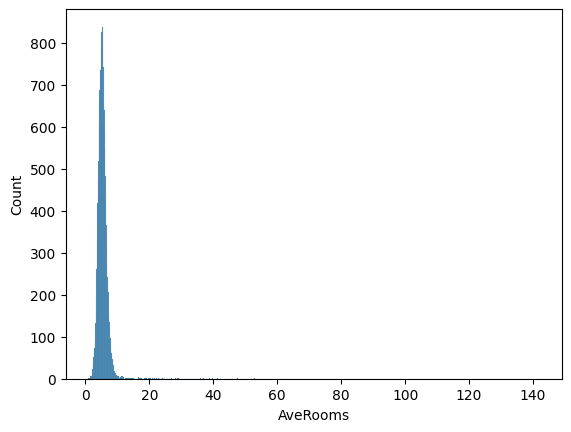

In [42]:
# feature distribution
#sns.histplot(data=data,x='AveRooms')
#data.AveOccup.value_counts()
#plt.figure(figsize=(10,6))
#sns.boxplot(data=data.loc[:,['MedInc','HouseAge','AveRooms','AveBedrms','AveOccup','Latitude','Longitude','MedHouseVal']])
#sns.boxplot(data=data.loc[:,['AveRooms','AveBedrms']])
#sns.boxplot(data=data.loc[:,['AveOccup']])

In [47]:
#data.loc[data.AveRooms>100,:] # 1914, 1974 row 제거
#data.loc[data.AveOccup>200,:] # 3364,13034,16669,19006 row 제거
# AveBerms, Longitutde column 제거
data = data.drop(index=[1914,1974,336,13034,16669,19006]) ## Remove Outliers
data = data.drop(columns=['AveBedrms','Longitude']) ## Remove Collinearity
data

,MedInc,HouseAge,AveRooms,Population,AveOccup,Latitude,MedHouseVal
0,8.3252,41.0,6.984127,322.0,2.555556,37.88,4.526
1,8.3014,21.0,6.238137,2401.0,2.109842,37.86,3.585
2,7.2574,52.0,8.288136,496.0,2.802260,37.85,3.521
3,5.6431,52.0,5.817352,558.0,2.547945,37.85,3.413
4,3.8462,52.0,6.281853,565.0,2.181467,37.85,3.422
...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,845.0,2.560606,39.48,0.781
20636,2.5568,18.0,6.114035,356.0,3.122807,39.49,0.771
20637,1.7000,17.0,5.205543,1007.0,2.325635,39.43,0.923
20638,1.8672,18.0,5.329513,741.0,2.123209,39.43,0.847


<Axes: >

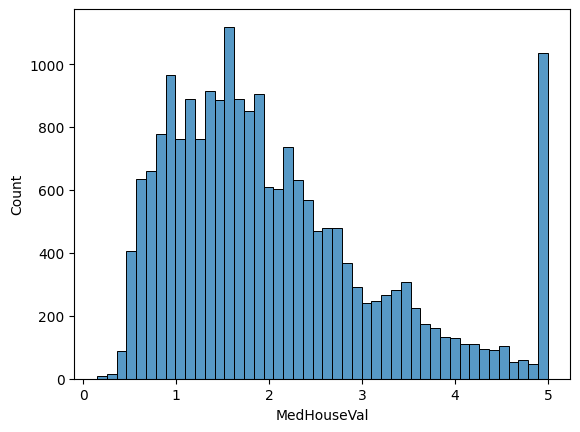

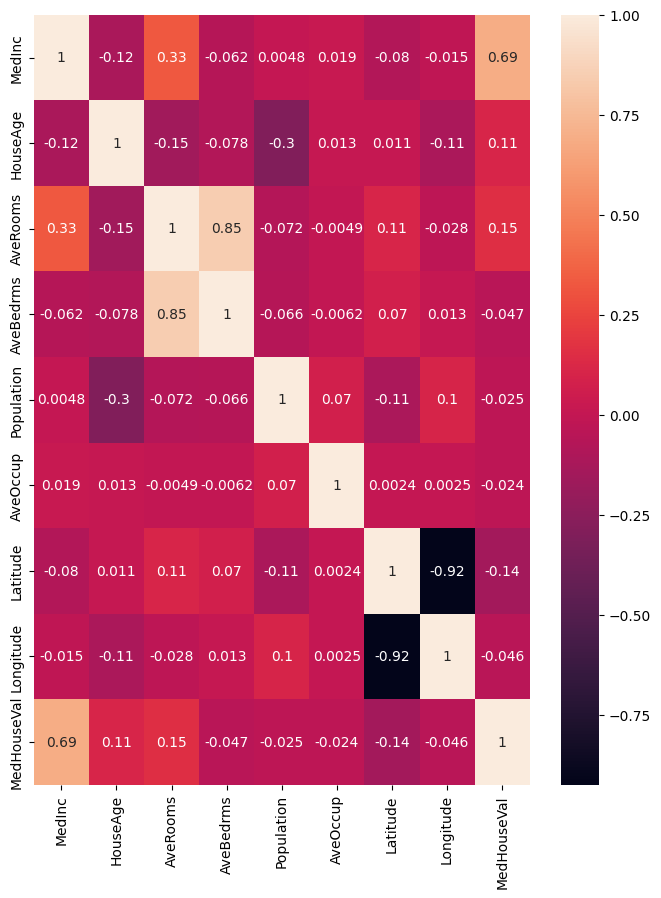

In [41]:
# target distribution
sns.histplot(data=data, x='MedHouseVal')
plt.figure(figsize=(8,10))
sns.heatmap(data.corr(),annot= True) # ave rooms and ave bedrms have a high corrleation, so we gonna pick one of them.

### 4. Training

- train-test split

- Standardization

- Model training

- Hyper-parameter tuning

- Evaluation

In [54]:
# 학습을 위한 training / test dataset 나누기
from sklearn.model_selection import train_test_split

##트테트테

X_train,X_test,y_train,y_test = train_test_split(x,y, test_size=0.2, random_state=42)

X_train,X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state= 42)


# 6:2:2 = train: val: test
print(X_train,X_test,y_train,y_test)




        MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
17244   2.3681      39.0  3.922460   1.018717      1404.0  3.754011     34.43   
8817   10.1357      24.0  7.564516   0.985112      2248.0  2.789082     33.74   
19686   1.6719      41.0  3.908012   0.916914       856.0  2.540059     39.13   
3545    4.8333       9.0  5.201093   1.009836      1884.0  2.059016     34.24   
17019   5.5902      38.0  7.010127   0.979747       994.0  2.516456     37.52   
...        ...       ...       ...        ...         ...       ...       ...   
5606    3.3427      16.0  3.748996   1.146586       951.0  1.909639     33.79   
16339   3.6083      16.0  5.720486   0.980903      2279.0  3.956597     38.04   
14965   3.9844      18.0  5.549834   1.014950      1952.0  3.242525     32.74   
11117   4.5112      16.0  4.414286   1.011429       730.0  2.085714     33.84   
8472    4.2000      35.0  4.372093   0.916279       640.0  2.976744     33.91   

       Longitude  
17244   

In [55]:
X_train

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
17244,2.3681,39.0,3.922460,1.018717,1404.0,3.754011,34.43,-119.67
8817,10.1357,24.0,7.564516,0.985112,2248.0,2.789082,33.74,-118.32
19686,1.6719,41.0,3.908012,0.916914,856.0,2.540059,39.13,-121.62
3545,4.8333,9.0,5.201093,1.009836,1884.0,2.059016,34.24,-118.63
17019,5.5902,38.0,7.010127,0.979747,994.0,2.516456,37.52,-122.30
...,...,...,...,...,...,...,...,...
5606,3.3427,16.0,3.748996,1.146586,951.0,1.909639,33.79,-118.29
16339,3.6083,16.0,5.720486,0.980903,2279.0,3.956597,38.04,-121.34
14965,3.9844,18.0,5.549834,1.014950,1952.0,3.242525,32.74,-116.99
11117,4.5112,16.0,4.414286,1.011429,730.0,2.085714,33.84,-117.87


In [59]:
# 학습을 위한 라이브러리 세팅
# Linear
from sklearn.linear_model import LinearRegression
# Lasso
from sklearn.linear_model import Lasso
# Ridge
from sklearn.linear_model import Ridge
# XGBOOST
from xgboost.sklearn import XGBRegressor
# LightGBM
from lightgbm.sklearn import LGBMRegressor

from sklearn.metrics import mean_squared_error

In [58]:
# feature scaling
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_val = scaler.fit_transform(X_val)
X_test = scaler.fit_transform(X_test)

In [64]:
#Training
reg = LinearRegression()
reg2 = Lasso()
reg3 = Ridge()
reg4 = XGBRegressor()
reg5 = LGBMRegressor()

reg.fit(X_train, y_train)
reg2.fit(X_train, y_train)
reg3.fit(X_train, y_train)
reg4.fit(X_train, y_train)
reg5.fit(X_train, y_train)

pred_train = reg.predict(X_train)
pred_train2 = reg2.predict(X_train)
pred_train3 = reg3.predict(X_train)
pred_train4 = reg4.predict(X_train)
pred_train5 = reg5.predict(X_train)

pred_val = reg.predict(X_val)
pred_val2 = reg2.predict(X_val)
pred_val3 = reg3.predict(X_val)
pred_val4 = reg4.predict(X_val)
pred_val5 = reg5.predict(X_val)


mse_train = mean_squared_error(y_train, pred_train)
mse_val = mean_squared_error(y_val, pred_val)

mse_train2 = mean_squared_error(y_train, pred_train2)
mse_val2 = mean_squared_error(y_val, pred_val2)

mse_train3 = mean_squared_error(y_train, pred_train3)
mse_val3 = mean_squared_error(y_val, pred_val3)

mse_train4 = mean_squared_error(y_train, pred_train4)
mse_val4 = mean_squared_error(y_val, pred_val4)

mse_train5 = mean_squared_error(y_train, pred_train5)
mse_val5 = mean_squared_error(y_val, pred_val5)

print("1. Linear Regression, train = %.4f, val =%.4f" %(mse_train, mse_val))

print("2. Lasso, train = %.4f, val= %.4f" %(mse_train2,mse_val2))

print("3. Ridge, train = %.4f, val =%.4f" %(mse_train3,mse_val3))

print("4. XGBOOST, train = %.4f, val =%.4f" %(mse_train4,mse_val4))

print("5. LightGBM, train = %.4f,val= %.4f" %(mse_train5,mse_val5))

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001824 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1838
[LightGBM] [Info] Number of data points in the train set: 12384, number of used features: 8
[LightGBM] [Info] Start training from score 2.068077
1. Linear Regression, train = 0.5144, val =0.5310
2. Lasso, train = 1.3246, val= 1.3734
3. Ridge, train = 0.5144, val =0.5310
4. XGBOOST, train = 0.0612, val =0.2988
5. LightGBM, train = 0.1450,val= 0.2951


In [73]:
# Hyper-parameter tuning : Sensitive for Light GBM
# 1. Human search
# 2 . GridserachCV(GridSearchCV) : 주어진 hp의 조합을 모두 돌려보는 방식
# 3. Bayesian Optimization (Optuna) : hyper-parameter을 최적화하는 베이지안 방식 사용


# GridSearchCV
from sklearn.model_selection import GridSearchCV

param_grid = {
    "max_depth" :[3,5,-1], #3
     "learning_rate" :  [0.1,0.01], #2
    "n_estimators" : [50,100] #2
    # 3x2x2 = 12
}
gcv = GridSearchCV(reg5, param_grid, scoring ='neg_mean_squared_error',verbose=1)
gcv.fit(X_train,y_train)
#print(gcv.cv_results_)
print(gcv.best_estimator_)
print(gcv.best_params_)

Fitting 5 folds for each of 12 candidates, totalling 60 fits
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001306 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1838
[LightGBM] [Info] Number of data points in the train set: 9907, number of used features: 8
[LightGBM] [Info] Start training from score 2.067708
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001261 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1838
[LightGBM] [Info] Number of data points in the train set: 9907, number of used features: 8
[LightGBM] [Info] Start training from score 2.066528
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001270 seconds.
You c

### 5. Test(Prediction)

In [ ]:
# training set과 같은 전처리! : DONE

final_model = gcv.best_estimator_

In [66]:
# prediction!
result = reg.predict(X_test)
result2 = reg2.predict(X_test)
result3 = reg3.predict(X_test)
result4 = reg4.predict(X_test)
result5 = reg5.predict(X_test)


mse_train = mean_squared_error(y_train, pred_train)
mse_val = mean_squared_error(y_val, pred_val)

mse_train2 = mean_squared_error(y_train, pred_train2)
mse_val2 = mean_squared_error(y_val, pred_val2)

mse_train3 = mean_squared_error(y_train, pred_train3)
mse_val3 = mean_squared_error(y_val, pred_val3)

mse_train4 = mean_squared_error(y_train, pred_train4)
mse_val4 = mean_squared_error(y_val, pred_val4)

mse_train5 = mean_squared_error(y_train, pred_train5)
mse_val5 = mean_squared_error(y_val, pred_val5)




In [68]:
# Summary!
print("---------- Linear Regression ---------")
print('MSE in training: %.4f' % mean_squared_error(y_test, result))

print("---------- Lasso ---------")
print('MSE in training: %.4f' % mean_squared_error(y_test, result2))

print("---------- Ridge ---------")
print('MSE in training: %.4f' % mean_squared_error(y_test, result3))

print("---------- XGBoost ---------")
print('MSE in training: %.4f' % mean_squared_error(y_test, result4))

print("---------- LightGBM ---------")
print('MSE in training: %.4f' % mean_squared_error(y_test, result5))

---------- Linear Regression ---------
MSE in training: 0.5413
---------- Lasso ---------
MSE in training: 1.3106
---------- Ridge ---------
MSE in training: 0.5413
---------- XGBoost ---------
MSE in training: 0.4927
---------- LightGBM ---------
MSE in training: 0.4210
